<a href="https://colab.research.google.com/github/mytreasury/Global_Terrorism_EDA_Project/blob/main/Global_Terrorism_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME - Global Terrorism

Project type - EDA


contribution - individual


Problem Statment

1) which types are wepons using.

2) which year the mostly happend the terrorist attatck 

3) which mothe the mostly happend the terrorist attatck 

4) Which terrorist organisation very power full

5) which region mostly terrorist attatck happened

6)Which types of attacks happend 


**Business object**

Find the types of weapons they are using

which types of system do we have to make 

which types of attacks happen


which organization is very strong for making that type of defense system we 
have to make 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
terrorism_df = pd.read_csv('/content/Global Terrorism Data.csv',encoding = "latin-1")

In [ ]:
terrorism_df = pd.DataFrame(terrorism_df)

In [ ]:
terrorism_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
terrorism_df.shape[0],terrorism_df.shape[1]

(181691, 135)

In [ ]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# we are using some data colume for analysing data beause of some colums having more null value we can't analysing this colume and thos colums are not very use full and not getting any more information for them.
# Renam the colums
terrorism_df = terrorism_df.rename(columns={"iyear": "year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"State","city":"City","attacktype1_txt":"Attack_type","targtype1_txt":"Target_txt","targsubtype1_txt":"Target_subtype","gname":"Gang_name","weaptype1_txt":"Wepon_txt"})



In [ ]:
terrorism_df = terrorism_df[["year","Month","Day","Country","Region","State","City","Attack_type","Target_txt","Target_subtype","Gang_name","Wepon_txt"]]

In [ ]:
terrorism_df

,year,Month,Day,Country,Region,State,City,Attack_type,Target_txt,Target_subtype,Gang_name,Wepon_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181270 non-null  object
 6   City            181257 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_txt      181691 non-null  object
 9   Target_subtype  171318 non-null  object
 10  Gang_name       181691 non-null  object
 11  Wepon_txt       181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [ ]:
terrorism_df.shape

(181691, 12)

In [ ]:
terrorism_df["Target_subtype"]=terrorism_df["Target_subtype"].fillna("others")

In [ ]:
terrorism_df["State"]= terrorism_df["State"].fillna("Unknown")

In [ ]:
terrorism_df["City"]=terrorism_df["City"].fillna("Unknown")

In [ ]:
terrorism_df.isnull().sum()

year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_txt        0
Target_subtype    0
Gang_name         0
Wepon_txt         0
dtype: int64

In [ ]:
terrorism_df.columns.unique()

Index(['year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_txt', 'Target_subtype', 'Gang_name',
       'Wepon_txt'],
      dtype='object')

In [ ]:
terrorism_df["Wepon_txt"].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [ ]:
terrorism_df.replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)':"Vehicle"},inplace=True)

In [ ]:
terrorism_df["Wepon_txt"].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [ ]:
terrorism_df = terrorism_df.rename(columns={"Wepon_txt":"Wepon_type"})



In [ ]:
terrorism_df["Wepon_type"].reset_index()

,index,Wepon_type
0,0,Unknown
1,1,Unknown
2,2,Unknown
3,3,Explosives
4,4,Incendiary
...,...,...
181686,181686,Firearms
181687,181687,Explosives
181688,181688,Incendiary
181689,181689,Explosives


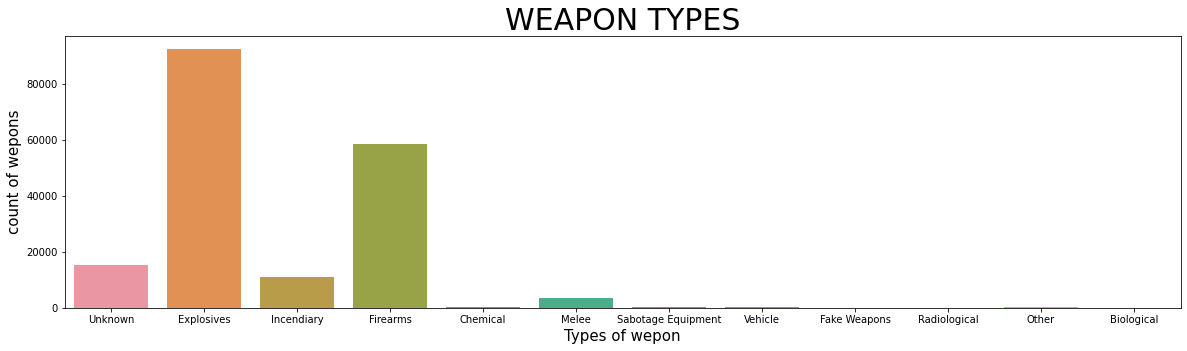

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=terrorism_df.Wepon_type)
plt.title("WEAPON TYPES",size = 30)
plt.xlabel("Types of wepon",size = 15)
plt.ylabel("count of wepons",size = 15)
plt.show()


I use the count plot to find which types of weapons they are using we can find Explosive weapons are using mostly.

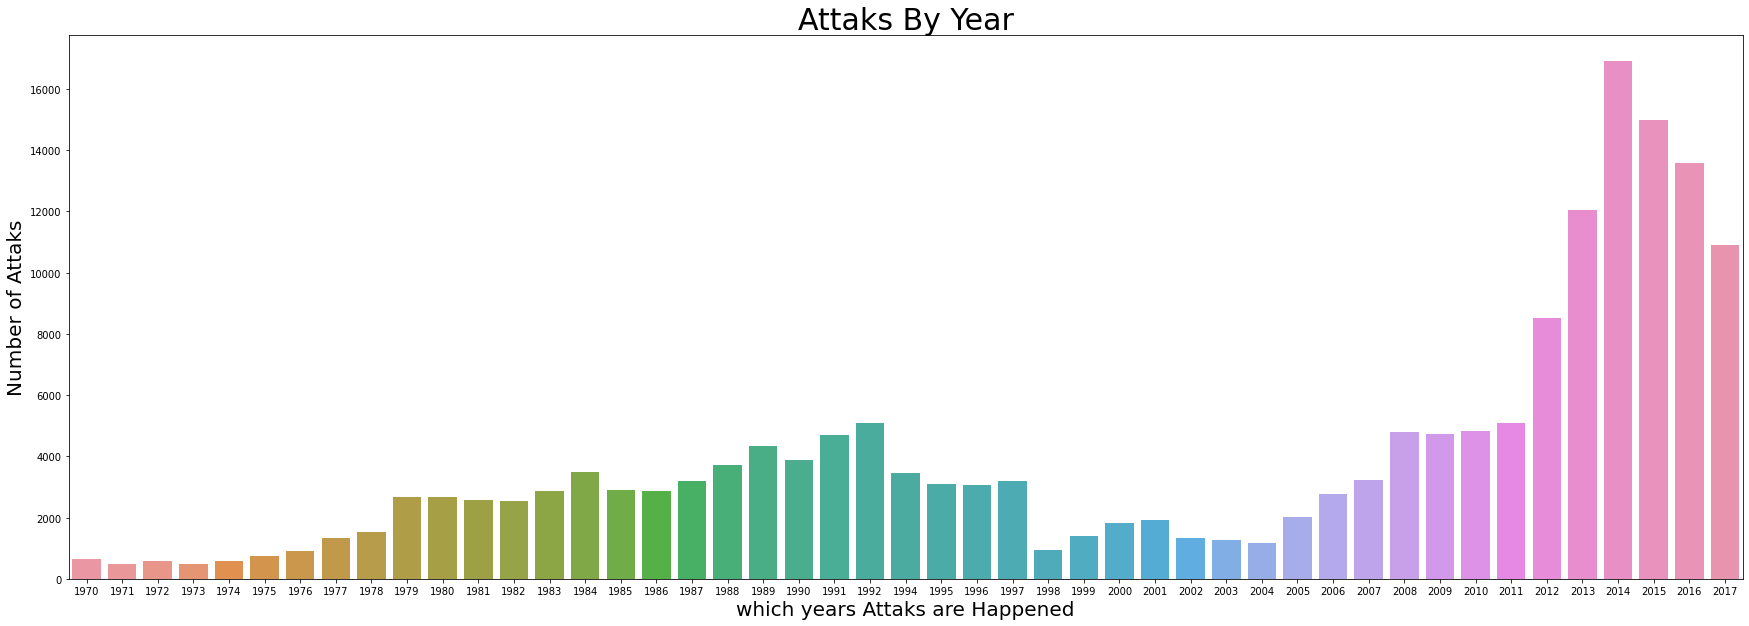

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x=terrorism_df.year)
plt.title("Attaks By Year",size = 30)
plt.ylabel("Number of Attaks",size = 20)
plt.xlabel("which years Attaks are Happened",size = 20)
plt.show()

This plot I used from 1970 to 2017 that year how many terrorist attacks happen.At 2014 terrosrist activity it's increated.


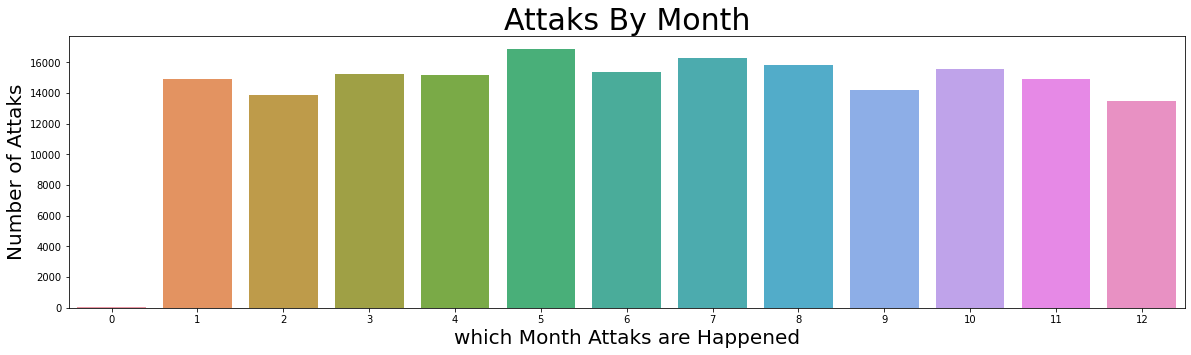

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=terrorism_df.Month)
plt.title("Attaks By Month",size = 30)
plt.ylabel("Number of Attaks",size = 20)
plt.xlabel("which Month Attaks are Happened",size = 20)
plt.show()

This plot I used for which moth the terrorist activity happening.Almost every mothe terrorist activity same.


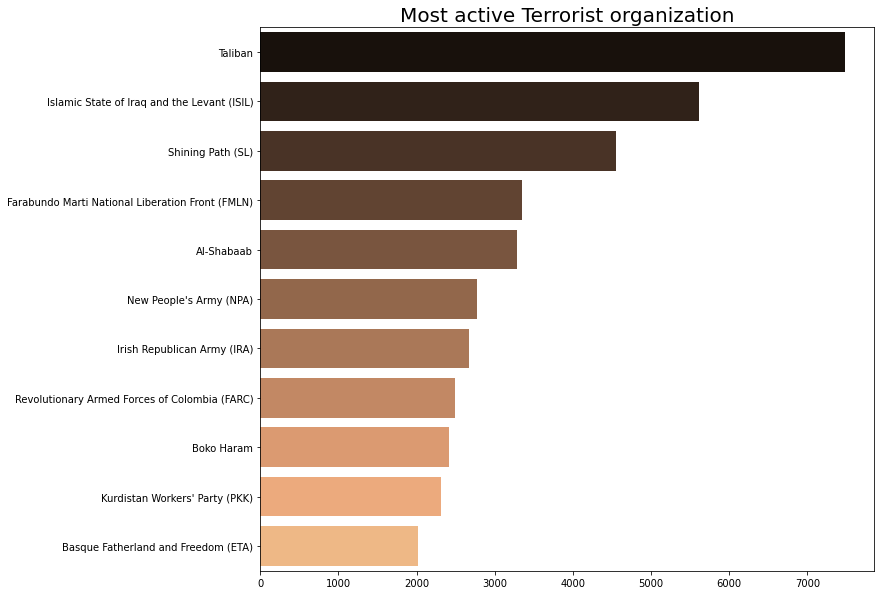

In [ ]:
#import plotly.express as px
plt.subplots(figsize=(11,10))
sns.barplot(y=terrorism_df["Gang_name"].value_counts()[1:12].index,x=terrorism_df["Gang_name"].value_counts()[1:12].values,palette="copper")
plt.title("Most active Terrorist organization",size=20)
plt.show()

This plot is showing which terrorist organization is very strong. Talibani terrorism organisation very storng .

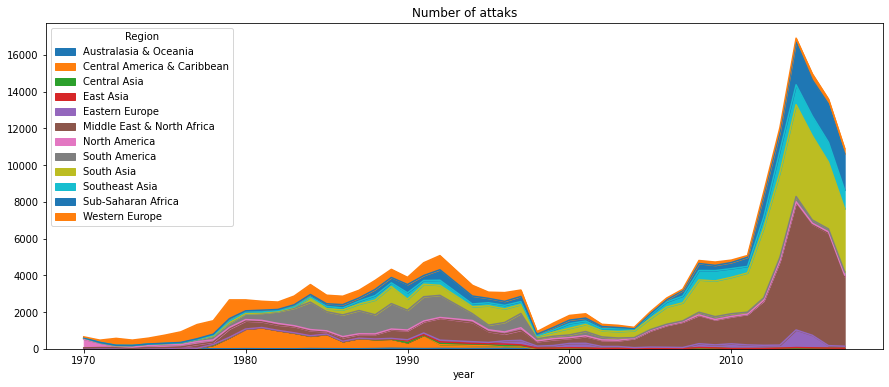

In [ ]:
pd.crosstab(terrorism_df.year,terrorism_df.Region).plot(kind="area",figsize = (15,6))
plt.title("Terrorist Activities by Region in each Year")
plt.title("Number of attaks")
plt.show()

This plot is showing several attacks happening in which region mostly.At 2010 Western Eurpoe and sub-Saharan Africa in that region most terrorist attack happend .

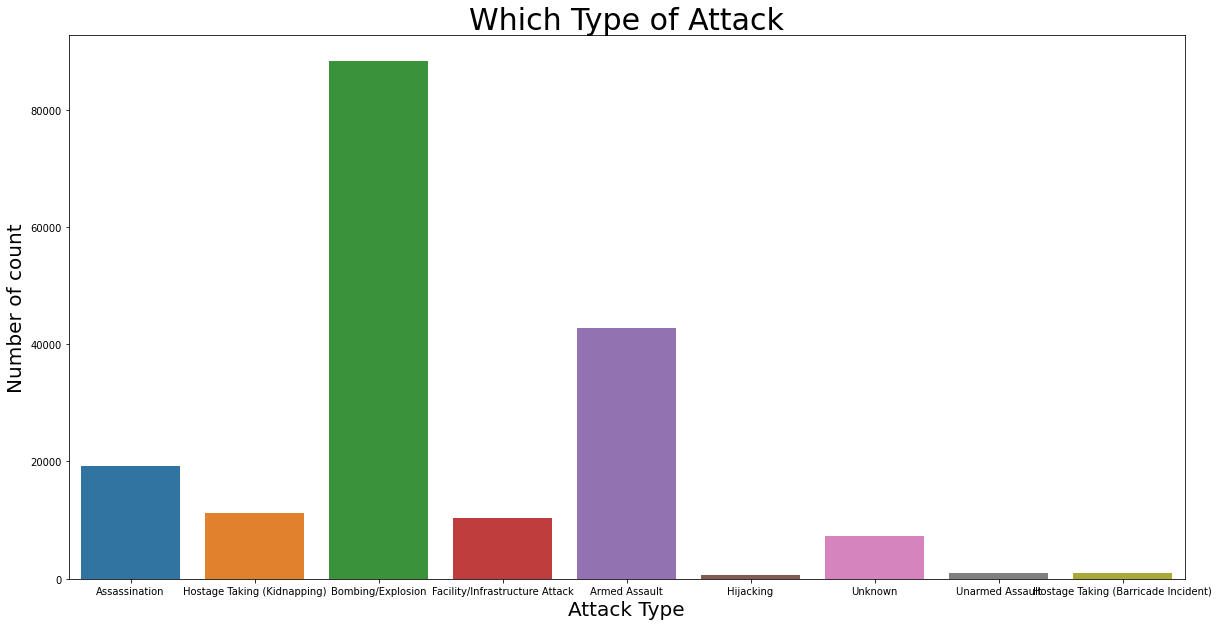

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=terrorism_df.Attack_type)
plt.title("Which Type of Attack",size = 30)
plt.xlabel("Attack Type",size = 20)
plt.ylabel("Number of count",size = 20)
plt.show()


This plot is showing which types of terrorist attacks happened.Bombing/Explosion attack is happened mostly.

**Project Summary**

My project name is Global Terrorism. This data is available from 1970 to 2017. 
I find that this is a very use the full project for all countries because the terrorist activity is happening everywhere. 
First, we download the data and import all libraries which will use in making grapes. 

I read the graph and find the all null value and which null values there in the column we replace and some columns are having a more null values.
 I remove the column and take only which column is used fully for analyzing data. I changed the column name.

First plot

I use the count plot to find which types of weapons they are using.

second plot

This plot I used from 1970 to 2017 that year how many terrorist attacks happen.

Third plot

This plot I used for which moth the terrorist activity happening.

Fourth plot

This plot is showing which terrorist organization is very strong.

Fifth plot

This plot is showing several attacks happening in which region mostly.

Six plot

This plot is showing which types of terrorist attacks happened 


On that plot, I analyzed the terrorist activity.




solution to Business bojective

This project will help to county defense system as well as which companies make weapons or defense security providing it will be used fully because they can make this type of weapon or security system.


In that,

 I found out which types of weapons we have to make explosives types of weapons we have to make.

The second thing is from 2014 to 2017 terrorist activity is increasing because of technology is increasing so we have to work on our technology 


Third, we can Taliban is are very strong terrorist organization so how can we keep watch on that I have to make this type of communication system.


which country or region very suffering from this terrorist activity we can make the weapons or defense system for this country.

**Conclusion**

My conclusion from that project is we have to focus on new technology because terrorists are using the most dangerous weapons. We find at 2014 most terrorist activity happened because weapons are made powerfully full 
my conclusion we have to make a powerful full defense system. In that Talibanisam this terrorist organization is very powerful full we have to keep watch on all activity .weston Europe region most terrorist activity happening we have to protect that.

---

